# Data Exploration

## Imports

In [1]:
# for linear algebra
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Structure Investigation

In this section we will explore the general shape of the dataset, as well as the data types of our features.

In [2]:
# for linear algebra
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
# read in the file and time how long it takes
filename = "../raw_data/EPL_Soccer_MLR_LR.csv"

%time 
df = pd.read_csv(filename)

# Extract feature matrix X
y = df['Score']
df_X = df.drop(columns=['Score'])

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 29.3 µs


First lets look at how many columns and rows the dataset has.

In [4]:
# print the shape of the dataset
print(df_X.shape)

(217, 12)


So we know the dataset has 217 observations and 12 features. How many different data types do these 13 features contain?

In [5]:
# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

float64    10
object      2
dtype: int64

## Structure of non-numerical features

In [6]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

,PlayerName,Club
0,"Braund, Mr. Owen Harris",MUN
1,"Allen, Mr. William Henry",MUN
2,"Moran, Mr. James",MUN
3,"McCarthy, Mr. Timothy J",MUN
4,"Palsson, Master. Gosta Leonard",MUN


The two non-numerical features are the name of the player and the club that they play for.

Using `.describe()` function we can investigate how many unique values each non-numerical feature has and the frequency of each.

In [7]:
df_X.describe(exclude="number")

,PlayerName,Club
count,202,202
unique,198,3
top,"Rogers, Mr. William John",CHE
freq,2,78


So there are 198 players across 3 clubs.

## Structure of numerical features

Next, let’s take a closer look at the numerical features. More precisely, let’s investigate how many unique values each of these feature has. This process will give us some insights about the number of binary (2 unique values), ordinal (3 to ~10 unique values) and continuous (more than 10 unique values) features in the dataset.

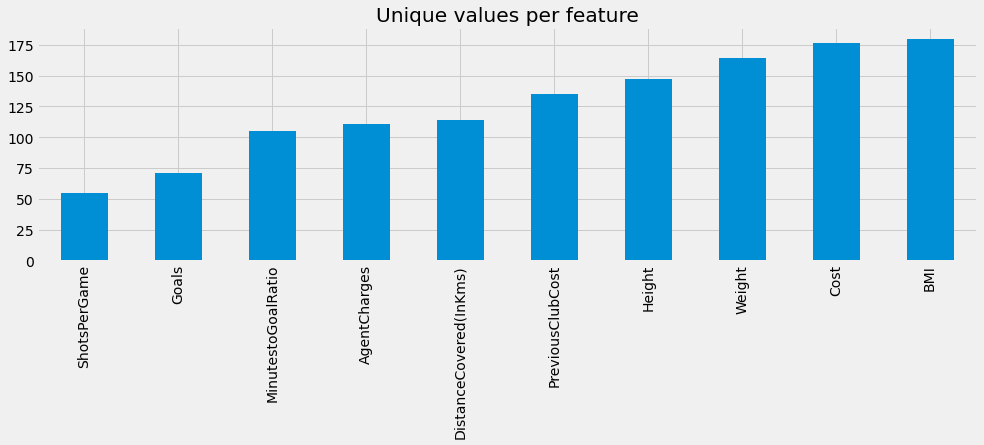

In [8]:
# For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# Plot information
unique_values.plot.bar(figsize=(15, 4), title="Unique values per feature");

All of our numerical features are continuous by the definition above (i.e. they have more than 10 unique values).

# Quality Investigation

Before focusing on the actual content stored in these features, let’s first take a look at the general quality of the dataset. The goal is to have a global view on the dataset with regards to things like duplicates, missing values and unwanted entries or recording errors.

## Duplicates

Duplicates are observations that represent the same sample point. 

In [9]:
# Chceck number of duplicates
n_duplicates = df_X.duplicated().sum()
print(f"There are {n_duplicates} duplicates in the dataset.")

There are 14 duplicates in the dataset.


In [10]:
df_X[df_X.duplicated()]

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Data cleaning by dropping rows with all nulls
#dropping Null and removing categorical columns
df_X.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
print(df_X.shape)

(202, 12)


## Missing values

Another important part of a dataset is the number of missing values. At this stage, we want to identify large holes in the dataset, i.e. samples or features with a lot of missing values. 

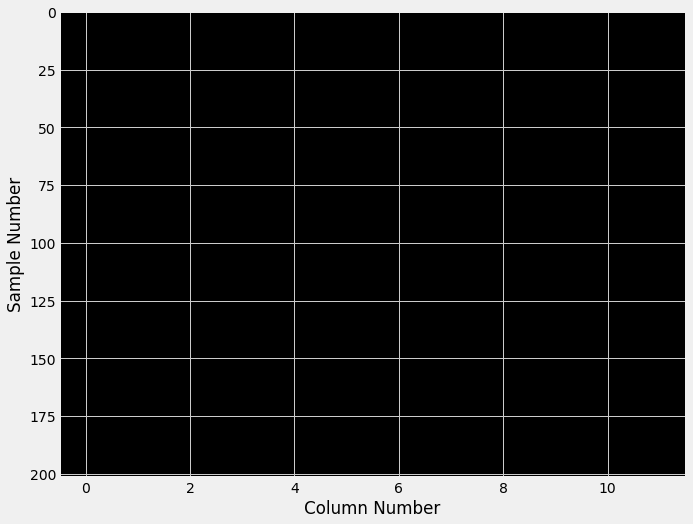

In [12]:
plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

This graph shows that of the 202 samples in df_X, there are no missing values in any of the features. If there were missing values, a white line would show on the chart for the sample and column number where the data was missing. It looks like we handled all of the missing data in when we dropped the rows with all null values. 

## Unwanted entries and recording errors

To detect unwanted entries and recording errors, one approach is to plot each feature and see if there are any unusual patterns. Lets do this for the numerical features below. 

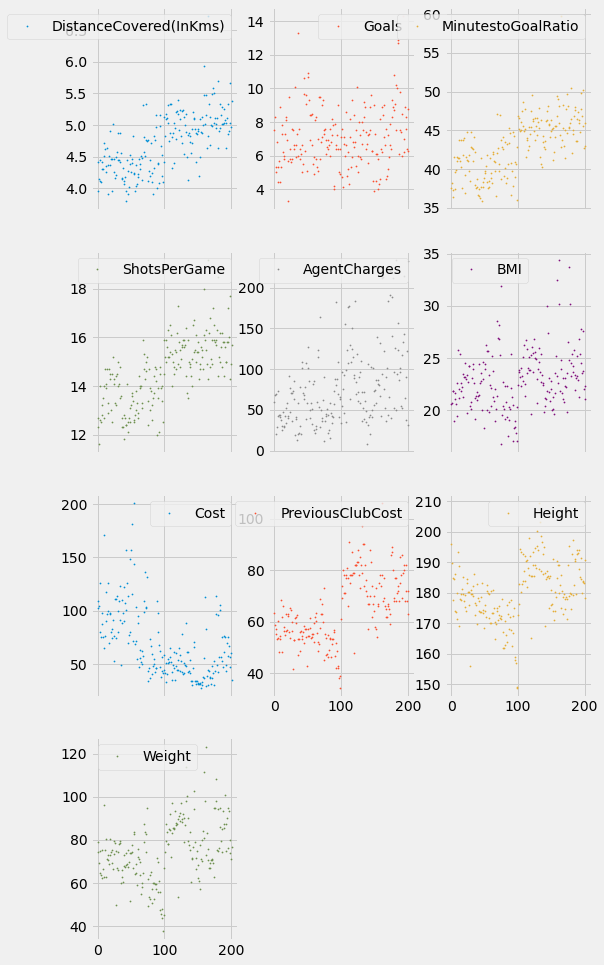

In [13]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 3), figsize=(8, 16), markersize=1.5);

Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. The y-axis shows the feature value, while the x-axis is the sample index. Nothing immediately jumps out from these plots, so lets leave them for now.

# Content Investigation

Now that we have investigated the general structure and quality of the dataset, we can go one step further and take a look at the actual content. In an ideal setting, such an investigation would be done feature by feature. But in this notebook, we will explore three different approaches that can give a very quick overview of the content stored in each feature and how they relate.

## Feature distribution

Looking at the value distribution of each feature is a great way to better understand the content of our data. Furthermore, it can help to guide our EDA, and provides a lot of useful information with regards to data cleaning and feature transformation. 

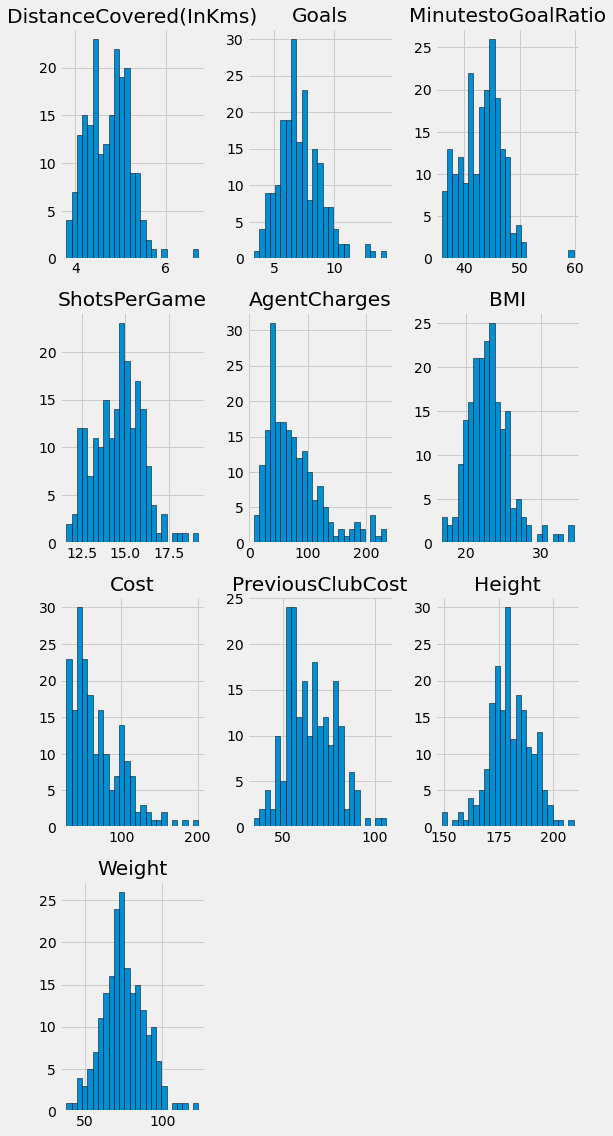

In [14]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(8, 16), layout=(-1, 3), edgecolor="black")
plt.tight_layout();

Most of the features show a roughly normal distribution, which is an important assumption when it comes to modelling. However, A couple fo the features look slightly right-skewed (Cost and AgentCharges) and we might want to transform these features to make them closer to a normal distribution. For example, we could use a log-transformation.

## Feature patterns

All of our features are continuous, so we can use seaborn's `pairplot` to visualize the relationships between the features.

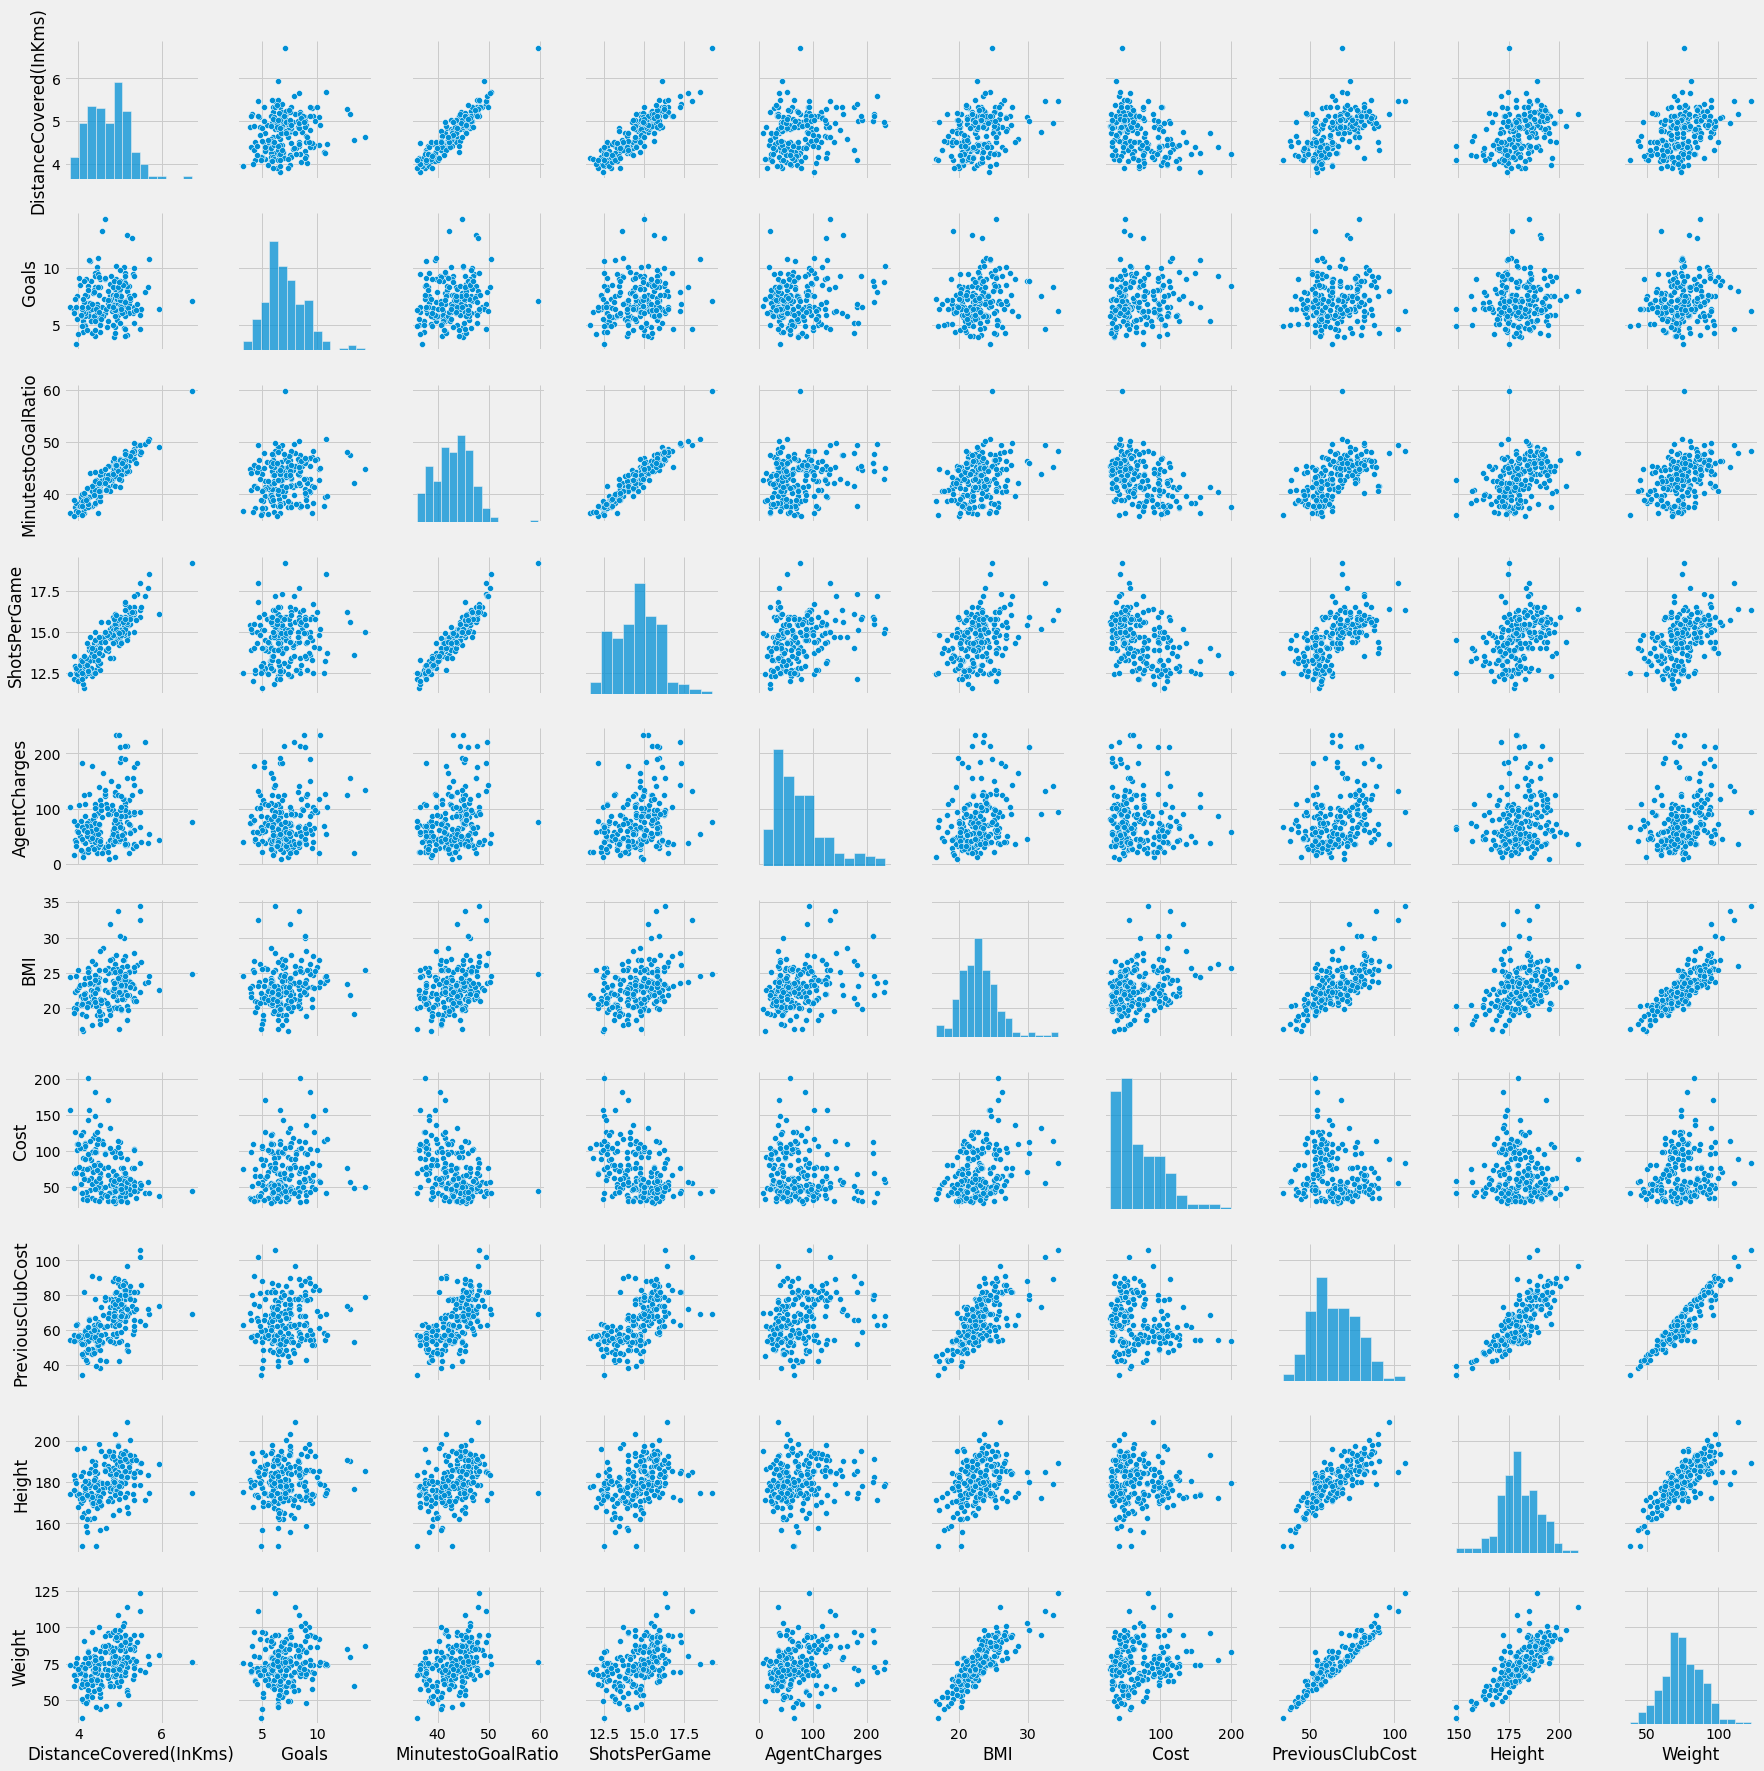

In [15]:
# Pairplot to show relationship between pair of features
sns.pairplot(df_X)

## Feature relationships

Last, but not least, let’s take a look at relationships between features. More precisely how they correlate. So let’s go ahead and compute the feature to feature correlation matrix for all numerical features.

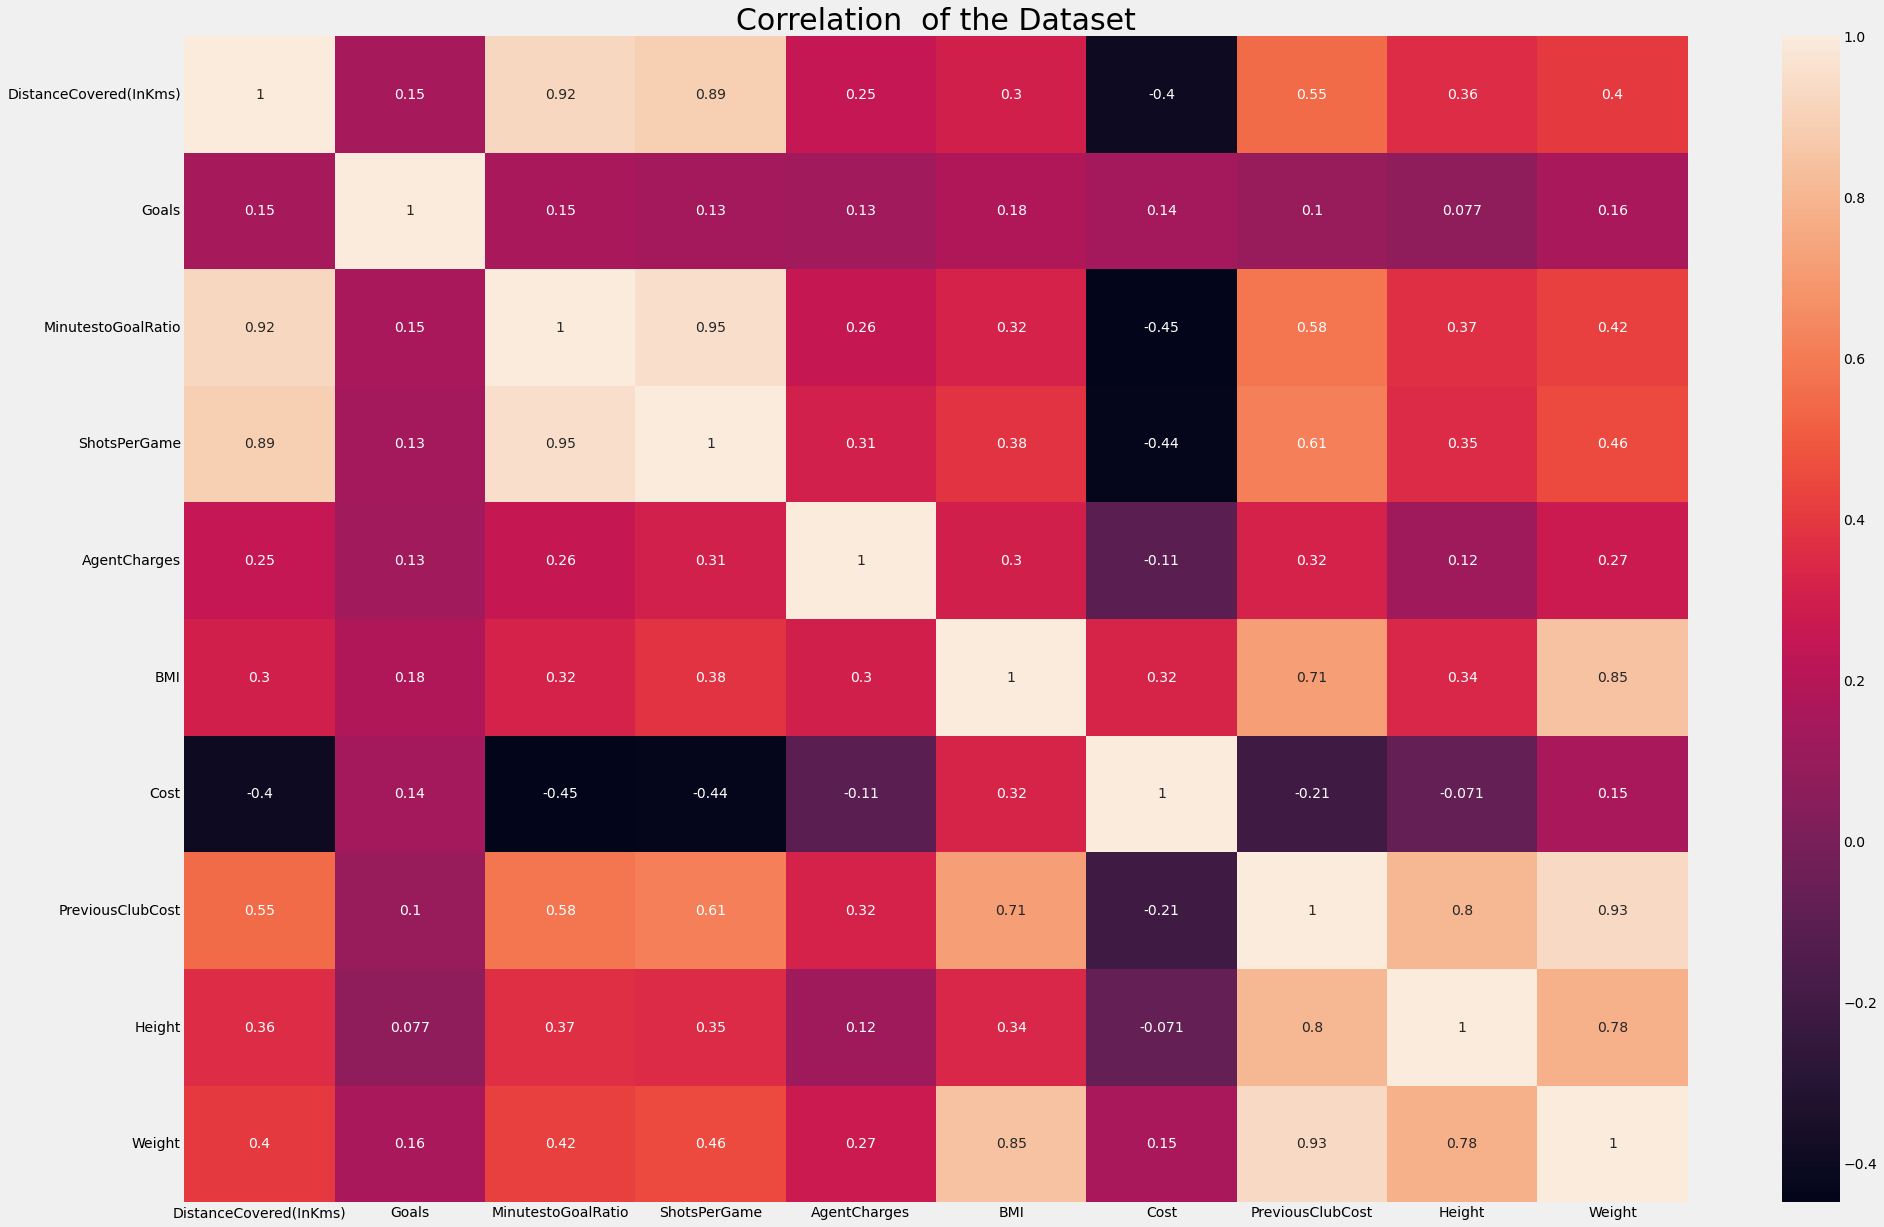

In [16]:
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

# plotting a correlation heatmap
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(df_corr, annot = True)
plt.title('Correlation  of the Dataset', fontsize = 30)
plt.show()

We can see some very high correlations already e.g. between Weight and PreviousClubCost, or DistanceCovered and MinutestoGoalRatio.

Another way to view this information is to order all of the correlations.

In [17]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values(ascending=False)

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

ShotsPerGame        MinutestoGoalRatio        0.950757
Weight              PreviousClubCost          0.930904
MinutestoGoalRatio  DistanceCovered(InKms)    0.924964
ShotsPerGame        DistanceCovered(InKms)    0.888800
Weight              BMI                       0.845955
Height              PreviousClubCost          0.802119
Weight              Height                    0.780906
PreviousClubCost    BMI                       0.713858
                    ShotsPerGame              0.610986
                    MinutestoGoalRatio        0.583375
                    DistanceCovered(InKms)    0.550975
Weight              ShotsPerGame              0.455255
                    MinutestoGoalRatio        0.423699
                    DistanceCovered(InKms)    0.403743
BMI                 ShotsPerGame              0.382524
Height              MinutestoGoalRatio        0.371192
                    DistanceCovered(InKms)    0.358854
                    ShotsPerGame              0.352322
          

When predicting the Score of a player (our target), we need to be careful not to include features that a very highly correlated to each other as this can lead to the problem of multicollinearity and make inference very difficult.

At the end of this third investigation, we should have a better understanding of the content in our dataset. We looked at value distribution, feature patterns and feature correlations. However, these are certainly not all possible content investigation and data cleaning steps you could do. Additional steps would for example be outlier detection and removal, feature engineering and transformation, and more.